<a href="https://colab.research.google.com/github/Gobihanath/DTect/blob/main/Copy_of_Extraction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


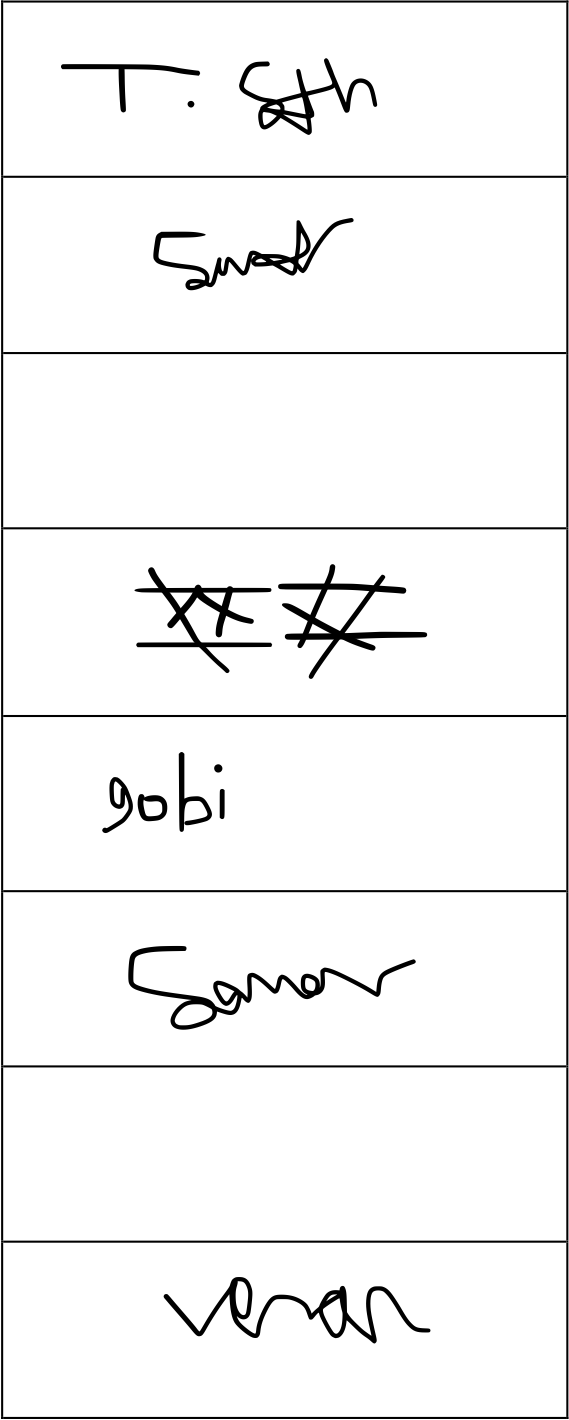

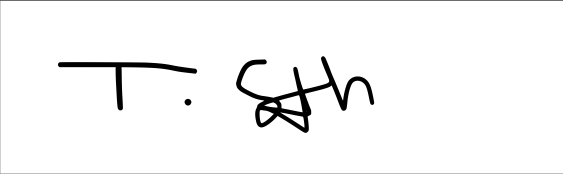

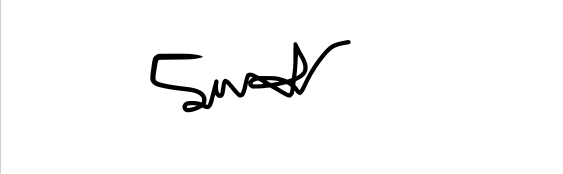

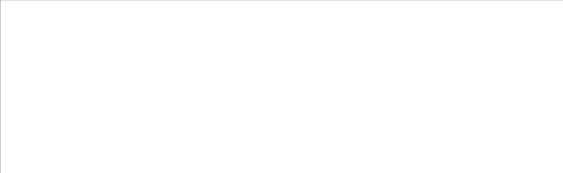

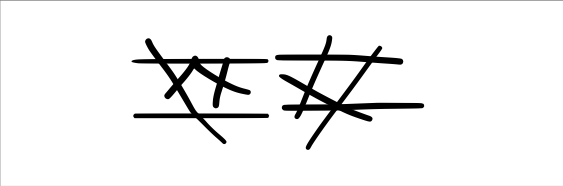

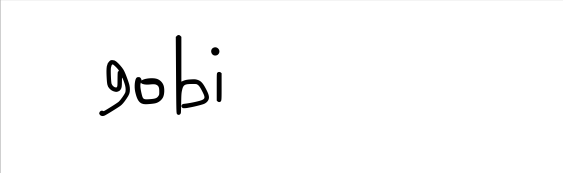

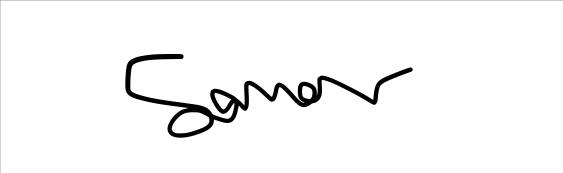

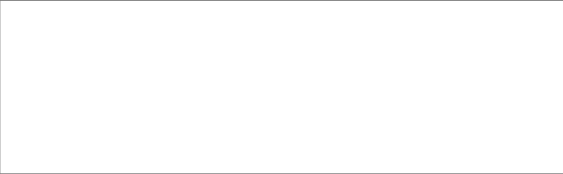

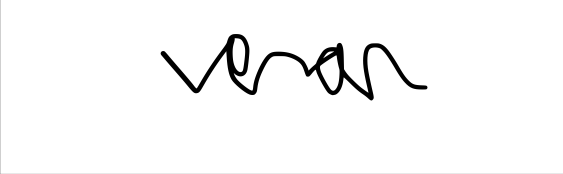

In [2]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

image = cv2.imread('/content/drive/MyDrive/mini1.png')

# Path to the Google Drive folder to save small box images
output_folder = '/content/drive/MyDrive/SMiniproject'
os.makedirs(output_folder, exist_ok=True)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area = 500

# Iterate through each contour
for i, contour in enumerate(contours):
    # Filter out small contours
    if cv2.contourArea(contour) > min_contour_area:
        # Extract the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the rectangular box from the original image
        box = image[y:y + h, x:x + w]
        # Display each rectangular box
        cv2_imshow(box)
        cv2.waitKey(0)

        # Now, find contours within the extracted box
        box_gray = cv2.cvtColor(box, cv2.COLOR_BGR2GRAY)
        box_blurred = cv2.GaussianBlur(box_gray, (5, 5), 0)
        box_edges = cv2.Canny(box_blurred, 50, 150)

        box_contours, _ = cv2.findContours(box_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Sort contours based on y-coordinate (top to bottom)
        contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])

        # Sort small contours based on y-coordinate (top to bottom)
        box_contours = sorted(box_contours, key=lambda x: cv2.boundingRect(x)[1])

        # Iterate through each contour inside the box
        for j, small_contour in enumerate(box_contours):
            # Filter out small contours
            if cv2.contourArea(small_contour) > min_contour_area:
                # Extract the bounding box of the small contour
                x_small, y_small, w_small, h_small = cv2.boundingRect(small_contour)

                # Extract the small rectangular box from the original image
                small_box = box[y_small:y_small + h_small, x_small:x_small + w_small]

                # Display each small rectangular box
                cv2_imshow(small_box)
                cv2.waitKey(0)

                # Save the small box image in the Google Drive folder
                small_box_path = os.path.join(output_folder, f'Small_Box_{i + 1}_{j + 1}.png')
                cv2.imwrite(small_box_path, small_box)

cv2.destroyAllWindows()
